DNN으로 집값 예측하기
2022년 1월 6일
김이룸

시냅스 연결이 강화되거나 약화된다. -> 웨이트(가중치)가 강화되거나 약화된다.
대전제 : 인공신경망의 학습은 가중치가 변하는 과정이다.(반드시 기억할 것)

집 하나 하나의 값이 아니라 한 동네의 평균 집값이다.
crim : 백분율이 아니다. 십만이 분모다.
데이터 스케일링 안하면 정확도가 오르지 않는다.

코딩 시 실행 전 세이브하는 습관을 들일 것.
코딩 시 커멘트를 다는 습관을 꼭 들일 것 -> 한주만 지나도 하나도 기억 안난다. 

https://keras.io/api/layers/core_layers/dense/

국문 : https://keras.io/ko/getting-started/sequential-model-guide/


import matplolib.pyplot as plt : import package.subpackage as nickname

from package import functionname : function만 import 해라

In [ ]:
# 1번 셀

print('hello-world')

# 패키지 수입
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

hello-world


In [ ]:
# 2번 셀

# 하이퍼파라미터 지정
MY_HIDDEN = 1000        # 은닉층 뉴런 수  1000 -> 10000
MY_EPOCH = 10            # 반복 학습 수 1-> 10 -> 100 : 횟수올리면 mse down 되나 총 학습시간이 증가한다.

# 판다스 테이블 출력 시 생략하는 컬럼을 방지하는 옵션
# pd.set_option('display.max_columns', None)          # 런타임 / 다시시작 및 모두실행      


# 중요중요 : 인공신경망 구조를 바꾸면 mse, 총 학습시간, 파라메터 총개수가 변한다.
# 히든층보다 이포크 늘리는게 mse 낮추는데 효율적이고 효과도 더 크다.

In [ ]:
# 3번 셀

# 데이터 파일 읽기
data = pd.read_csv('/content/drive/MyDrive/my-data/housing.csv')

# 데이터 샘플 출력 - \
print(data.head(5))     
print(data.tail(5))

# 데이터 통계 출력
print(data.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  
        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741

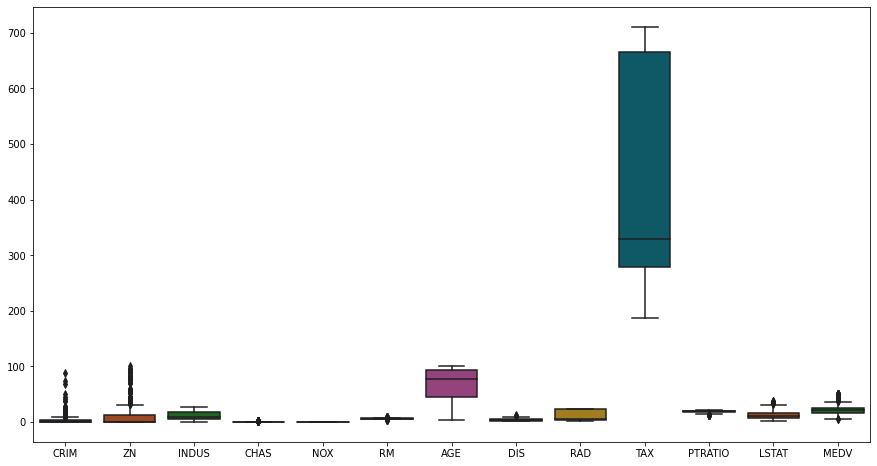

In [ ]:
# 4번 셀

# 상자 그림
plt.figure(figsize=(15,8)) # 크기 정하는 함수 : fisize=(가로인치,세로인치)
sns.boxplot(data=data, palette='dark') # x축은 피처, y축은 값



전환 전 :  <class 'numpy.ndarray'>
전환 후 :  <class 'pandas.core.frame.DataFrame'>
         0         1         2         3         4         5         6   \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         7         8         9         10        11        12  
0  0.140214 -0.982843 -0.666608 -1.459000 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032 -1.026501  1.487503  
                 0             1             2             3             4   \
count  5

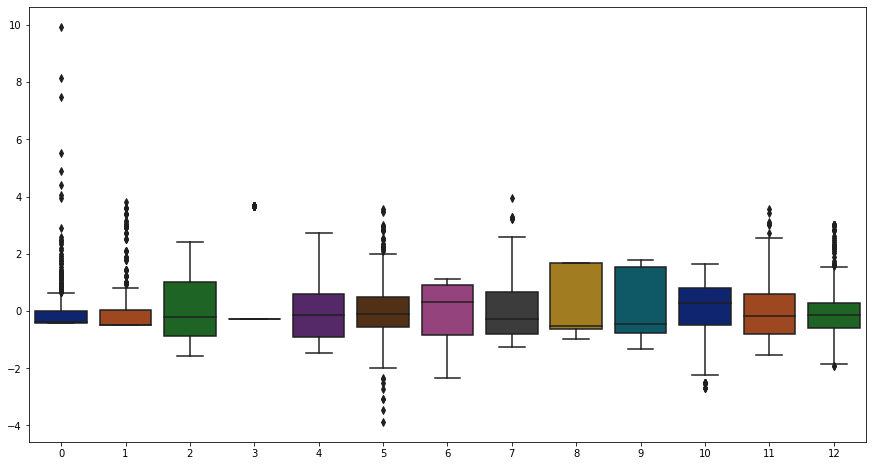

In [ ]:
# 5번 셀

# 데이터 정규화 
# z-점수 정규화는 그 결과를 numpy로 전환함
scaler = StandardScaler()
z_data = scaler.fit_transform(data) # -> 정규화 하고 싶지 않다고 이 행을 주석처리하면 에러가 난다. 밑에서 z-data 사용하기 때문이다.
# 이 에러를 어떻게 고칠까.
# z-data를 data로 바꾸고 앉아 있기에는 무식한 방법이다.
# 그러면 어떤 방법이 인텔리한 방법일까?
# z_data = data 
# 위 라인을 위위 라인 대신 추가해주면 아래 수정안하고 그대로 돌려도 에러가 안난다고 했는데 에러가 났다.
# 에러 고차는법 : 6번셀 X_data, y_data 수정해야한다. 
# X_data = z_data.drop('MEDV',axis=1 )

# 정규화 안한 상태로 학습여부 확인하려면 상자그림 그려서 확인해봐라. 스케일링 안되어 있으면 정규화 안한것이다.
# 정규화 안하고 학습시키면 학습시간은 별차이가 없으나 mse가 nan이 나온다.
# nan : not a number -> 수치화할 수 없을만큼 크다는 의미. 무한에 가깝다.
# 정규화 안하면 학습을 할 '수'가 없다. 아예 안된다. 따라서 무조건 정규화해라.




# z-데이터를 numpy에서 pandas로 전환
print('전환 전 : ',type(z_data))
z_data = pd.DataFrame(z_data)
print('전환 후 : ',type(z_data))
print(z_data.head())

# 정규화 전 : 0  0.00632  18.0   2.31     0  0.538  ...    1  296     15.3   4.98  24.0
# 정규화 후 : 0 -0.419782  0.284830 -1.287909  ... -1.459000 -1.075562  0.159686
# 결과해석 : 키가 고만고만하다.

# z-점수 정규화 후 통계 출력
print(z_data.describe()) 
# -8.688702e-17 : 0
# 1.000990e+00 : 1
# -4.247810e-16 : 0
# 1.000990e+00 : 1
# 이런 분포를 표준정규분포라고 한다



# 상자 그림
plt.figure(figsize=(15,8)) # 크기 정하는 함수 : fisize=(가로인치,세로인치)
sns.boxplot(data=z_data, palette='dark') # data=z_data
# 상자의 크기가 고만고만해졌다.
# 아래 상자 y-axis의 스케일을 0에서 700까지 늘리면 위 상자그림처럼 된다.
# 위 상자그림 y-axis의 스케일을 -4부터 10까지로 줄이면 아래 상자그림처럼 된다.

# 정규화 여부 파악은 상자그림 키가 비슷한지 여부를 보고 판단한다. 비슷하면 한것. 아니면 안한거.

In [ ]:
# 6번 셀 : 일부로 에러 발생시킨 셀이다.

# 데이터를 입력과 출력으로 분할 (데이터 2분할)

X_data = z_data.drop('MEDV', axis=1) # pandes에서 특정 컬럼을 빼는 함수, column은 axis=1
# 넘파이에서 판다스로 바꿔줄 때, 열 이름이 사라졌다. 컬럼 이름을 다 버렸다.

# 데이터 4분할 - 학습용 입력, 학습용 출력, 평가용 입력, 평가용 출력으로 raw를 분할함.



KeyError: ignored

In [ ]:
# 6-1번 셀 : 6번셀 문제해결

# 데이터를 입력과 출력으로 분할 (데이터 2분할)
X_data = z_data.drop(12, axis=1) # 숫자로 컬럼지정 시 따옴표 쓰면 에러난다. 안쓰면 된다. 
# print(X_data)
y_data = z_data[12]
# print(Y_data)

# 데이터 4분할 - 2피스를 2분할 하면 총 4피스가 된다. (Azure : train test split)
# 순서 중요 - 학습용입력, 학습용출력, ... 평가용출력
# train_test_split(입력데이터, 출력데이터, 학습용데이터사이즈,)
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    train_size=0.7)

# 데이터 모양 출력 - 모양(shape)확인이 엄청 중요하다.
print('학습용 입력 모양 : ', X_train.shape)     # 왜 (354,12)가 나왔을까?   A : 354는 506*0.7 -> 판서참고
print('학습용 출력 모양 : ', y_train.shape)     # 왜 (354,)가 나왔을까?   A : 1차원튜플은(number,)
print('평가용 입력 모양 : ', X_test.shape)      # 왜 (152,12)가 나왔을까? A : 152=506*0.3이고 12는 feature 개수
print('평가용 출력 모양 : ', y_test.shape)      # 왜 (152,)가 나왔을까?   A : 1차원튜플은(number,)
# 관찰 : 입력데이터는 2차원, 출력데이터는 1차원튜플이다
# 은닉층 간의 뉴런 개수는 반드시 일치해야하는가? A : 아니다. 최적치로 지정한다.

In [ ]:
# 7번 셀

# 인공신경망 구현
# Sequential 방식 : 입력부터 출력으로 한층 한층 추가하는 방식을 Sequential 방식이라고 한다.
model = Sequential()

# 첫단계 : 입력층 + 은닉층1 동시에 추가
# units= 은닉층1에 몇개의 뉴런을 생성할 것인가
# 하이퍼 파라메터 셀에서 은닉층1에 생성할 노드의 개수를 바꾸고자 하면 벨류만 바꾸면 된다. 그래서 따로 뺀 것이다.
# 입력층 1000개, 은닉층1 설정은 이하와 같이한다.
model.add(Dense(units=MY_HIDDEN,
                input_dim=12,
                activation='relu'))

# 두번째 단계 : 은닉층2 추가
model.add(Dense(units=MY_HIDDEN,
                activation='relu'))

# 마지막 단계 : 출력층 추가
# 출력층 뉴런1 개, 출력층은 액티베이션 안쓴다.
# 코딩이 허무하도록 간단하다.
model.add(Dense(units=1))

# DNN(Deep Neural Network)
# 딥러닝 실행 시실행시 알트 엔터가 아닌, 다시시작 및 모두실행으로 런할 것.
# Parm# : 가중치 숫자를 의미한다. 첫번째 은닉층에는 만삼천개 
# 출력층 1001개 가중치
# 다 더하면 Totla params : 우리가 만든 인공신경망의 가중치 총개수를 알려준다. -> Total params: 1,015,001
# 학생질문 : 가중치의 개수가 정해지는 기준이 있는건가요? 아니면 임의로 결정되는건가요? 
model.summary() # 매우 중요한 내용을 보여주는 코드임. 정확하게 이해할 것.
# 이하 서머리 결과에 대한 해설이다. 판서를 참고하라.
# 백만이 어디서 튀어나온 것인가? 
# 첫번ㅉ ㅐ 입력층 뉴런 12개 
# 은닉층 1 뉴런 1000개
# 시냅스 만이천개. 입력층과 은닉층1 사이의 시냅스개수.
# Dense : 완전연결 -> fully connected 
# 만삼천은 만이천 더하기 + 1000(시냅스에붙은편향값)이다.
# 가중치는 시냅스에 편향값은 뉴런에 붙어있다.
# 시냅스 하나마다 숫자가 다 있다..
# 뉴런에도 숫자가 하나씩 있다.
# 그래서 시냅스 만이천개, 뉴런 편향값 천개, 총 만삼천개 파라매터가 나온 것이다.
# 은닉층 2 뉴런수 천개.
# 은닉층 2 완전연결 풀커넥트하면 시냅스 백만개
# 은닉층 2 동네에서 파라메타 개수는 백만천개
# 출력 뉴런 1개
# 출력층과 은닉층2 풀리커넥하면 파라메타 1001개
# 시냅스 천개
# 1,015,001 = 13000 + 1001000 + 1001

# loss가 매번 감소하는데 그 원리는 무엇니가?
# 질문 (n,)는 1d-array인데 (,n)도 1d-array인지? 맞다면 형태는 (n,)'인지? 

In [ ]:
# 8번 셀

# DNN 학습
# 첫번째 단계 : 학습환경 설정
# 옵티마이저 엄청 중요함
# mse : 정답과 예측값 사이의 오차를 제곱해서 더한 합계 (오차값)
# sgd 설명은 일단 생략.
model.compile(optimizer='sgd',
              loss='mse')

# 학습진행
print('학습 시작')
begin = time() # 학습시작 시간을 기록한다.

# 데이터 입력 순서 중요함
# 학습용 입력
# 학습용 출력
# 11번 반복해서 학습한 결과를 보기위함
# 반복학습 수를 바꾸려면 2번 셀로 가서 변경
# epochs는 반복학습 횟수를 하이퍼파라메터로 지정.
model.fit(X_train,
          y_train,
          epochs=MY_EPOCH,
          verbose=1)

end = time()
print('총 학습 시간 : ', end -begin) # 끝난시간 빼기 시작한 시간은 학습시간

# 12/12는 배치사이즈와 관련된다.
# 354를 뭐하면 29.5다.
# 배치사이즈는 한번에 데이터를 몇개 갖고 올것이냐는 의미다.
# 배치사이즈는 소수점이 나오면 안된다. 
# 질문 : 로스값이 하락하는 원리는 뭔가?  아래 loss도 mse 계산인가? A : mse맞음.
# 배치사이즈는 컴퓨팅 환경에 따라서 케라스가 맞춰준다. 그래서 따로 지정 안한 것이다.

In [ ]:
# 9번 셀

# DNN 평가
# 애저의 스코어 모델 모듈과 같은 기능을 구현하는 것임.
# 평가용 152문제를 model이 푼것이다
# score는 최종 mse 값이다.
# mse 0.3 해석해봐라. 좋은거냐 나쁜거냐?
# mse는 퍼센트가 아니다.
# mse 그대로의 값이다.
# 답 : 0.3은 작은게 아니라 큰거다.
# 답 해설 : 집값 다 짜그라들었다. 정규화해서 축소되었다.
# 정규화한 집값의 단위는 더 이상 유에스 달라가 아니다.
# -2와 3 사이의 값을 예측했기에 mse 0.3은 적은 값이 아니다.
score = model.evaluate(X_test,
                        y_test)

print('최종 mse 손실값 : ', score)

In [ ]:
# 10번 셀

# DNN  예측
# 애저로 할 적에는 비주얼라이즈하면 결과가 나왔으나 predict함수 사용해서 봐야한다.
pred = model.predict(X_test) # 이렇게 하면 DNN이 152 문제를 푼다.
# print(pred) # 이게 DNN이 152개의 집값을 예측한 것이다.
# 152개 다 찍지말고 첫번쨰 문제 푼 결과만 뽑아보자
print('첫번째 집값 예측(Z-점수) : ',pred[0][0])
print('첫번째 집값 정답(Z-점수) : ',y_test.iloc[0]) # 정답 어딨을까? y_test[0]하면 에러가 난다. 판다기 때문에 에러가 난다. 따라서 y_test.iloc[0]으로 해야한다. ilocator 써야 에러가 안남.

# 이렇게 해봤자 인간에게는 무의미한 숫자다. 달러로 고쳐야 인간에게 의미가 생긴다. 
# (Z-점수)를 정상적으로 달러로 어떻게 전환할까? 답 : 역전환해야한다. 
# 역전환은 어떻게 해야할 것인가? 답 : 그것도 함수가 있다.
# 무엇이냐 : inverse 뭐시기다. 내용이 너무 깊은 관계로 설명 생략한다.

# 제트 점수에서 달러로 역전환하기

# pred = scaler.inverse_transform(pred) # 이렇게 하면 역전환된다. 근데 에러가 난다. 이렇게 하면 역전환이 에러가 나서 안된다. -> 내용이 깊어서 일단은 스킵한다.달러전환 스킵한다.
# print('첫번째 집값 예측(Z-달러) : ',])
# print('첫번째 집값 정답(Z-달러) : ',])

# 실험 : MY-EPOCH =100이면 mse 50% 다운됨

In [ ]:
# 코랩으로 케라스 코딩.
# 어려움이 있어도 실망마라. 10번 기회가 남았다.
# 문제가 있으면 알려주라.디렉메시지 보내라.